In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('low_con.jpg',0)
#s = np.zeros_like(img, dtype=np.int32)

def task1(img):
    min_v =np.percentile(img,5)
    max_v = np.percentile(img, 95)
    s = img.copy()
    for i in range(img.shape[0]):  
        for j in range(img.shape[1]):  
            if img[i, j] > max_v:
                s[i, j] = 255 
            elif img[i, j] < min_v:
                s[i, j] = 0   
            else:
                
                s[i, j] = 255*((s[i,j]-min_v)/(max_v-min_v))
    #print(s)         
    return s


In [3]:
strecth_img =task1(img)
cv2.imshow('strecth',strecth_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
def histogram(img):
    array = [0] * 256
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel_val = int(img[i, j])
            array[pixel_val] += 1
    array = np.array(array)
    return array
def pdf(hist, row,col):
    hist= (hist)/(row*col)
    return hist

def cdf_mul(arr):
    for i in range(len(arr)):
        arr[i] = arr[i]*255
    return arr

In [6]:

#pdf_arr = hist/(img.shape[0]*img.shape[1])

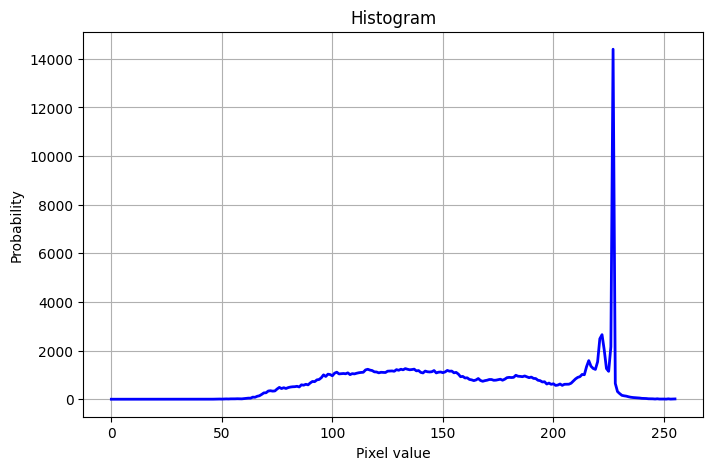

In [7]:
hist = histogram(img)
plt.figure(figsize=(8, 5))
plt.plot(range(256), hist, color='blue', linewidth=2)
plt.title("Histogram")
plt.xlabel("Pixel value")
plt.ylabel("Probability")
plt.grid()
plt.show()

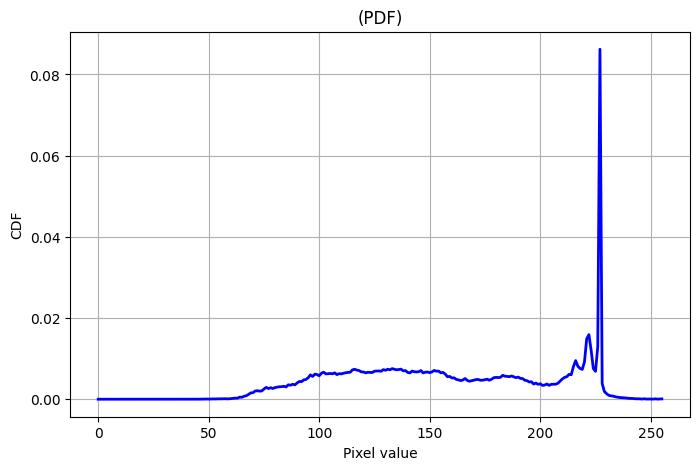

In [8]:
pdf_arr = hist/(img.shape[0]*img.shape[1])
plt.figure(figsize=(8, 5))
plt.plot(range(256), pdf_arr, color='blue', linewidth=2)
plt.title("(PDF)")
plt.xlabel("Pixel value")
plt.ylabel("CDF")
plt.grid()
plt.show()

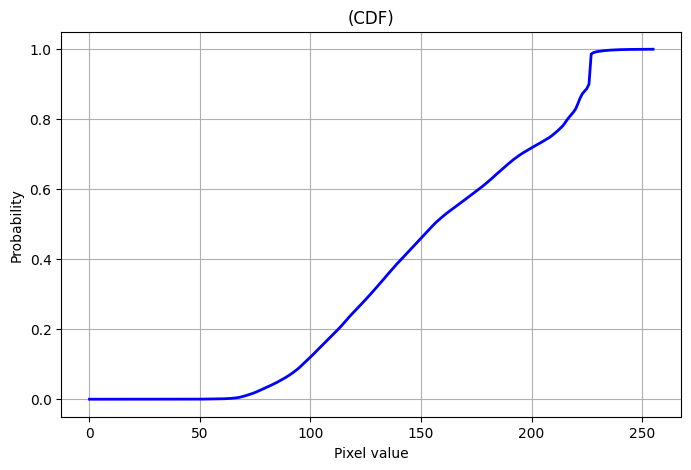

In [9]:
def cdf(arr):
    cdf_arr = [0] * len(pdf_arr) 
    cdf_arr[0] = pdf_arr[0]  
    for i in range(1, len(pdf_arr)):  
        cdf_arr[i] = cdf_arr[i-1]+pdf_arr[i]  
    return cdf_arr

cdf_arr = cdf(pdf_arr)

plt.figure(figsize=(8, 5))
plt.plot(range(256), cdf_arr, color='blue', linewidth=2)
plt.title("(CDF)")
plt.xlabel("Pixel value")
plt.ylabel("Probability")
plt.grid()
plt.show()

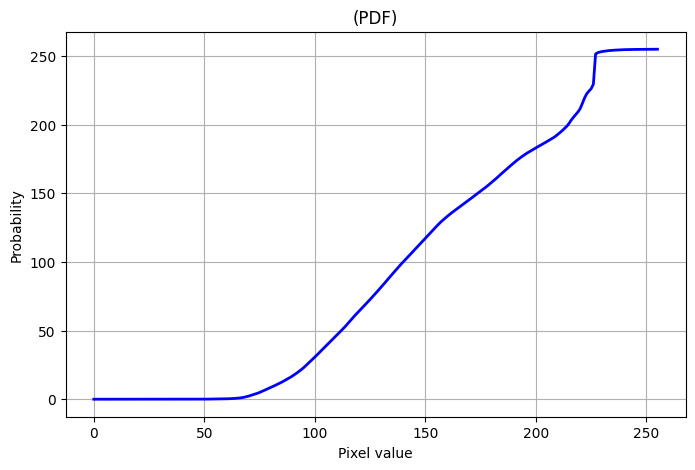

In [10]:
cdf_new = cdf_arr
for i in range(256):
    cdf_new[i] = cdf_arr[i]*255
plt.figure(figsize=(8, 5))
plt.plot(range(256), cdf_new, color='blue', linewidth=2)
plt.title("(PDF)")
plt.xlabel("Pixel value")
plt.ylabel("Probability")
plt.grid()
plt.show()

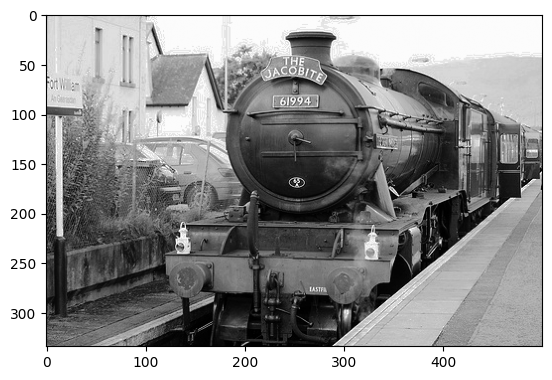

In [11]:
enhanced_img = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        enhanced_img[i, j] = cdf_new[img[i, j]]
plt.imshow(enhanced_img, cmap="grey")

Task 3


In [113]:
def conv(img, size):
    filter = np.ones((size, size)) / (size * size)
    print(filter.shape)
    arr = img.copy()
    pad_val = size//2
    arr = np.pad(arr, pad_val, 'constant', constant_values=0)
    arr2 = img.copy()
    print(img.shape)
    print(arr.shape)
    for i in range(1, arr.shape[0]-1):
        for j in range(1, arr.shape[1]-1):
            img_window = arr[i-pad_val:i+pad_val+1, j-pad_val:j+pad_val+1]
            arr2[i-pad_val, j-pad_val] = np.sum(filter * img_window)
    return arr
    

In [1]:
import numpy as np
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('fig05.tif',0)
#s = np.zeros_like(img, dtype=np.int32)

def conv(img, size):
    filter = np.ones((size,size))/(size*size)
    pad_val = size//2
    arr = np.pad(img, pad_val, 'constant', constant_values=0)
    arr2 = np.zeros_like(img)
    for i in range(pad_val, arr.shape[0] - pad_val):
        for j in range(pad_val, arr.shape[1] - pad_val):
            img_window = arr[i-pad_val:i+pad_val+1, j-pad_val:j+pad_val+1]
            arr2[i-pad_val, j-pad_val] = np.sum(filter * img_window)
    arr2 = arr2.reshape(img.shape[0], img.shape[1]).astype(np.uint8)
    return arr2

conv_img = conv(img, 5)

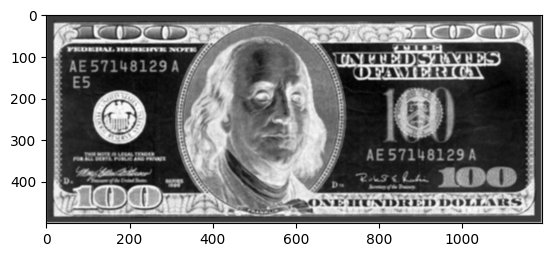

In [2]:
import matplotlib.pyplot as plt
plt.imshow(conv_img, cmap='Greys')

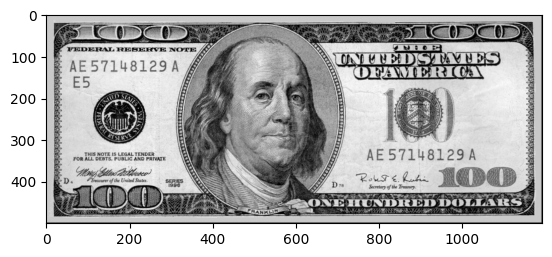

In [3]:
plt.imshow(img, cmap = 'grey')